----
**Autocorrelation Function (ACF)**

- **Purpose**: Shows the correlation between $ X_t $ and its past values.

- **Formula**:

  $$
  \rho_k = \frac{\text{Cov}(X_t, X_{t-k})}{\text{Var}(X_t)}
  $$

- **Sample ACF**:

  $$
  r_k = \frac{\sum_{t=k+1}^{n} (X_t - \bar{X})(X_{t-k} - \bar{X})}{\sum_{t=1}^{n} (X_t - \bar{X})^2}
  $$

- **Interpretation**:
  - **MA (q) Process**: ACF cuts off (or becomes insignificant) after $ q $ lags.

**Partial Autocorrelation Function (PACF)**

- **Purpose**: Measures the direct effect of $ X_{t-k} $ on $ X_t $, excluding the effects of intermediate lags.

- **Formula**:

  $$
  X_t = \phi_{k1} X_{t-1} + \phi_{k2} X_{t-2} + \dots + \phi_{kk} X_{t-k} + \varepsilon_t
  $$ 

  - $ \phi_{kk} $: PACF value at lag $ k $, capturing the unique contribution of $ X_{t-k} $. <br> <br>
 
    
- **Conditional Correlation Interpretation**: The PACF at lag $ k $ is the correlation between $ X_t $ and $ X_{t-k} $, conditioned on $ X_{t-1}, X_{t-2}, \dots, X_{t-k+1} $. This means it measures the direct relationship between $ X_t $ and $ X_{t-k} $, excluding any influence from intermediate lags.

- **Interpretation**:
  - **AR($ p $) Model** (stationary): PACF cuts off (or become insignificant) sharply after $ p $.

---


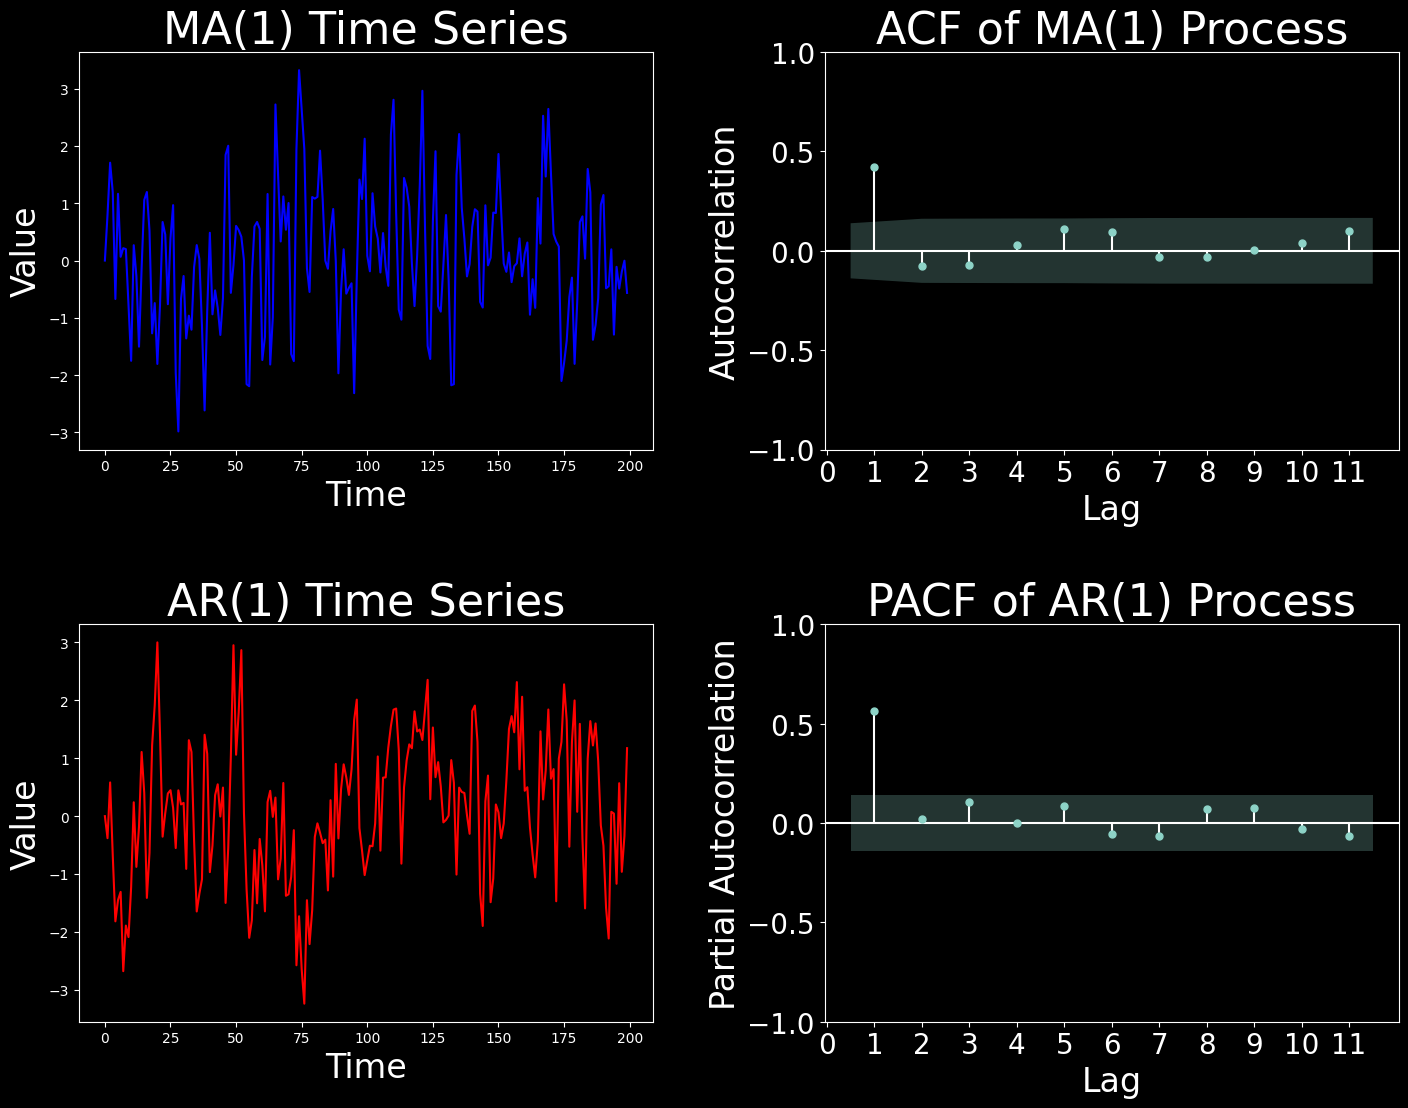

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set seed for reproducibility
np.random.seed(47); plt.style.use('dark_background')

# Parameters for MA(1) and AR(1)
phi_1, theta_1, n_samples = 0.6, 0.6, 200  # MA(1) and AR(1) coefficients, Number of samples

# Generate MA(1) and AR(1) processes
epsilon_ma = np.random.normal(0, 1, n_samples)
ma_data = np.concatenate(([0], phi_1 * epsilon_ma[:-1] + epsilon_ma[1:]))  # Generate MA(1)
ar_data = np.zeros(n_samples)
for t in range(1, n_samples): ar_data[t] = theta_1 * ar_data[t-1] + np.random.normal(0, 1)  # Generate AR(1)

# Create the figure and axis for 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))


axs[0, 0].plot(ma_data, color="b")
axs[0, 0].set_title('MA(1) Time Series', fontsize=32)  
axs[0, 0].set_xlabel('Time', fontsize=24)  
axs[0, 0].set_ylabel('Value', fontsize=24)  

plot_acf(ma_data, lags=11, ax=axs[0, 1], title="ACF of MA(1)", alpha=0.05, zero=False)
axs[0, 1].set_title('ACF of MA(1) Process', fontsize=32)
axs[0, 1].set_xlabel('Lag', fontsize=24)  
axs[0, 1].set_ylabel('Autocorrelation', fontsize=24)  
axs[0, 1].set_xticks(np.arange(0, 12, 1)) 
axs[0, 1].tick_params(axis='both', labelsize=20)  

# Plot the AR(1) time series and its PACF in the second row
axs[1, 0].plot(ar_data, color="r")
axs[1, 0].set_title('AR(1) Time Series', fontsize=32)  
axs[1, 0].set_xlabel('Time', fontsize=24)  
axs[1, 0].set_ylabel('Value', fontsize=24)  

plot_pacf(ar_data, lags=11, ax=axs[1, 1], title="PACF of AR(1)", alpha=0.05, zero=False)
axs[1, 1].set_title('PACF of AR(1) Process', fontsize=32)
axs[1, 1].set_xlabel('Lag', fontsize=24) 
axs[1, 1].set_ylabel('Partial Autocorrelation', fontsize=24)  
axs[1, 1].set_xticks(np.arange(0, 12, 1))  
axs[1, 1].tick_params(axis='both', labelsize=20)  

# Adjust layout to prevent overlap
plt.tight_layout(pad=4)

# Show the plots
plt.show()